<a href="https://colab.research.google.com/github/balajiabcd/Euro-USD-Stock-Price-Prediction/blob/main/euro_and_usd_stock_prediction06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("/content/Entire.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,2020-12-02 09:53,1.20584,1.20586,1.20577,1.20583,263
1,2020-12-02 09:54,1.20583,1.20586,1.20577,1.20577,230
2,2020-12-02 09:55,1.20575,1.20589,1.20569,1.20586,268
3,2020-12-02 10:00,1.20536,1.20564,1.20530,1.20552,298
4,2020-12-02 10:01,1.20551,1.20563,1.20525,1.20542,481


# Data Analysis

In [3]:
data["Date"] =  [datetime.strptime(a, '%Y-%m-%d %H:%M') for a in data.Date]
data = data.sort_values(by = "Date").reset_index()
data = data.drop("index", axis = 1)
data["date"] =  [a.date() for a in data.Date]

In [4]:
data.head()

,Date,Open,High,Low,Close,Volume,date
0,2007-01-01 00:00:00,1.31908,1.31973,1.31872,1.31952,145690,2007-01-01
1,2007-01-01 00:00:00,1.31908,1.32095,1.31650,1.32058,1946843,2007-01-01
2,2007-01-01 01:00:00,1.31908,1.31964,1.31896,1.31913,24827,2007-01-01
3,2007-01-01 01:00:00,1.31908,1.31964,1.31894,1.31915,47067,2007-01-01
4,2007-01-01 01:30:00,1.31920,1.31943,1.31894,1.31915,22240,2007-01-01


In [5]:
data.tail()

,Date,Open,High,Low,Close,Volume,date
940398,2021-01-22 22:55:00,1.21701,1.21717,1.21666,1.21667,2352,2021-01-22
940399,2021-01-22 22:56:00,1.21709,1.21712,1.21706,1.21709,564,2021-01-22
940400,2021-01-22 22:57:00,1.21709,1.21710,1.21702,1.21706,690,2021-01-22
940401,2021-01-22 22:58:00,1.21705,1.21709,1.21704,1.21706,473,2021-01-22
940402,2021-01-22 22:59:00,1.21705,1.21717,1.21666,1.21667,249,2021-01-22


In [6]:
date, volume, start, close, ave  = [],[],[],[],[] 
d, o, c, vol = data.date[0] - timedelta(1), 0, 0, 0
for i in range(len(data)):
    if d != data.date[i]:
        d = data.date[i]
        low_time = data.Date[i].time()
        high_time = data.Date[i].time()
        o, c, vol = data.Open[i], data.Close[i], data.Volume[i]
        date.append(d)
        volume.append(vol)
        start.append(o)
        close.append(c)
        ave.append((o+c)/2)
        
    if low_time > data.Date[i].time():
        low_time = data.Date[i].time()
        o = data.Open[i]
        
    if high_time < data.Date[i].time():
        high_time = data.Date[i].time()
        c = data.Close[i]
        
    if vol != data.Volume[i]:
        vol += data.Volume[i]
    
    

In [7]:
new_data = pd.DataFrame({ 
    'date' : date,
    'volume' : volume,
    'open' : start,
    'close': close,
    'ave' : ave })
print(len(new_data))
new_data.head()

4398


,date,volume,open,close,ave
0,2007-01-01,145690,1.31908,1.31952,1.319300
1,2007-01-02,25112,1.32033,1.32106,1.320695
2,2007-01-03,24481,1.32762,1.32710,1.327360
3,2007-01-04,23233,1.31626,1.31683,1.316545
4,2007-01-05,24544,1.30893,1.30845,1.308690


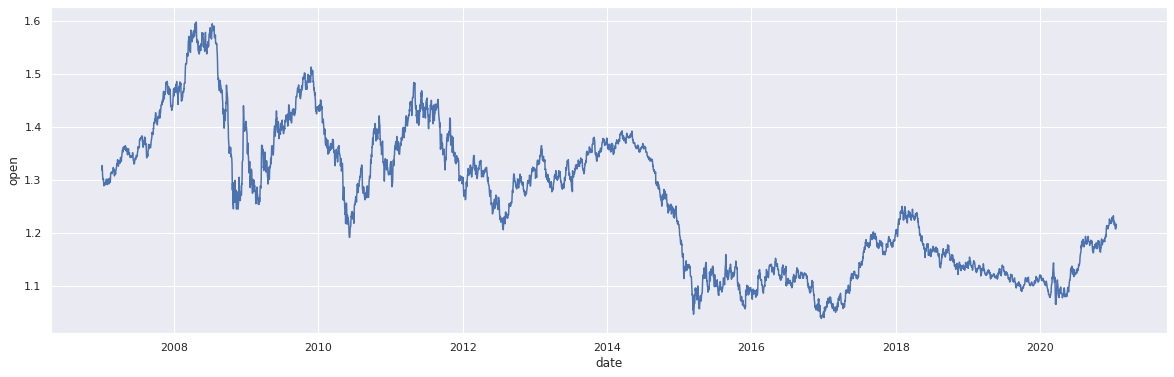

In [8]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="open")

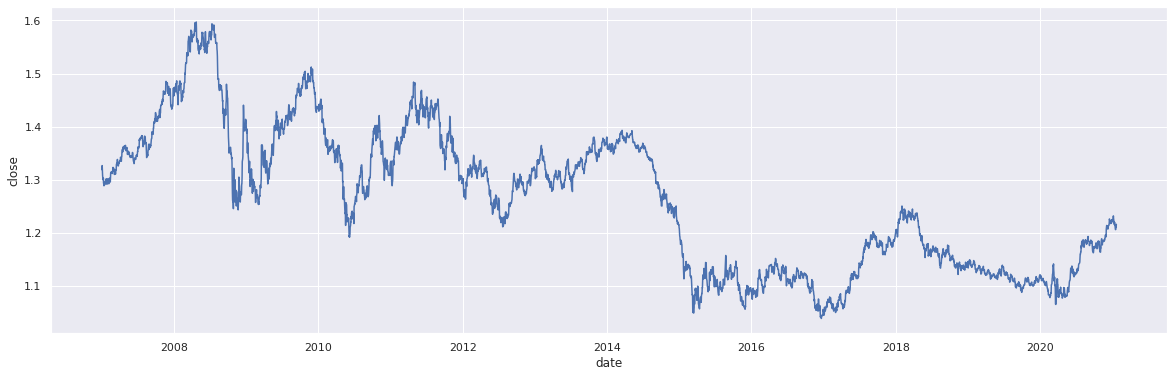

In [9]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="close")

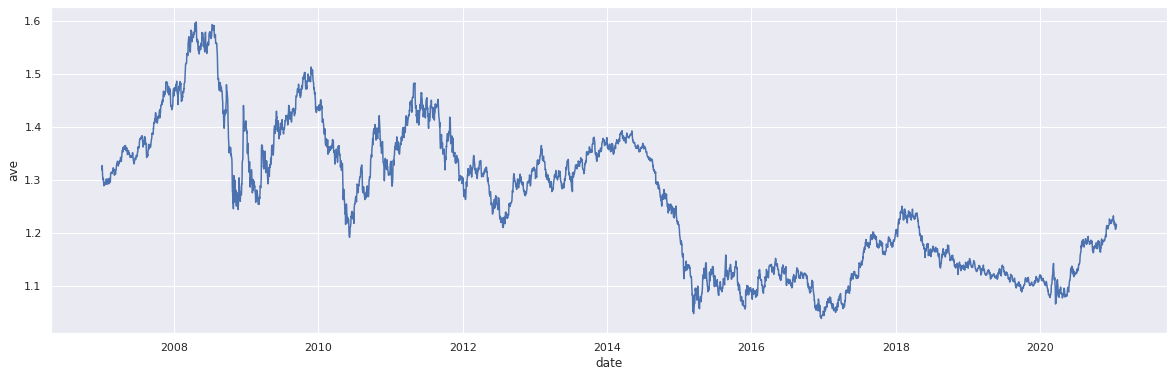

In [10]:
plt.figure(figsize = (20,6))
sns.lineplot(data=new_data, x="date", y="ave")

# Training and test set Preparation

In [11]:
ave = [a*100 for a in ave]

In [12]:
a = 100

In [13]:
X_data, y_data = [], []
for i in range(a,len(ave)):
    X_data.append( ave[i-a:i] )
    y_data.append( ave[i] )

len(X_data)

4298

In [14]:
X_train, X_val, X_test = X_data[:3000], X_data[3000:3350], X_data[3350:]
y_train, y_val, y_test = y_data[:3000], y_data[3000:3350], y_data[3350:]

In [15]:
def arraying(s):
    return np.array(s)

def shapeshift(s):
    s = arraying(s)
    return np.reshape(s, (s.shape[0], s.shape[1], 1))

X_train, X_val, X_test = shapeshift(X_train), shapeshift(X_val), shapeshift(X_test)
y_train, y_val, y_test = arraying(y_train), arraying(y_val), arraying(y_test)

In [16]:
X_train.shape

(3000, 100, 1)

# Building RNN model (LSTM)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import layers

In [18]:
model = Sequential([layers.Input((a,1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(32, activation = "relu"),
                    layers.Dense(1)
                   ])

model.compile(loss="mse", optimizer = "Adam", metrics = ["mean_absolute_error"])

In [19]:
model.fit(X_train,y_train, validation_data = (X_val, y_val), epochs = 30)

Epoch 1/30
94/94 [==============================] - 8s 55ms/step - loss: 16422.6152 - mean_absolute_error: 127.4689 - val_loss: 9078.4219 - val_mean_absolute_error: 95.1222
Epoch 2/30
94/94 [==============================] - 5s 49ms/step - loss: 4909.6709 - mean_absolute_error: 59.5118 - val_loss: 428.6605 - val_mean_absolute_error: 20.0042
Epoch 3/30
94/94 [==============================] - 5s 48ms/step - loss: 137.4076 - mean_absolute_error: 9.0789 - val_loss: 273.4836 - val_mean_absolute_error: 15.8208
Epoch 4/30
94/94 [==============================] - 5s 49ms/step - loss: 82.1335 - mean_absolute_error: 6.9272 - val_loss: 17.5154 - val_mean_absolute_error: 3.2879
Epoch 5/30
94/94 [==============================] - 4s 48ms/step - loss: 9.2587 - mean_absolute_error: 1.9474 - val_loss: 3.7204 - val_mean_absolute_error: 1.5980
Epoch 6/30
94/94 [==============================] - 5s 49ms/step - loss: 3.1971 - mean_absolute_error: 1.2478 - val_loss: 3.2575 - val_mean_absolute_error: 1.518

# Train Set Results

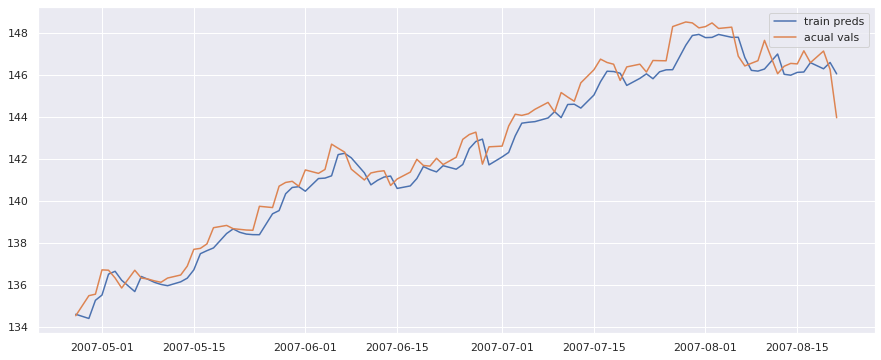

In [20]:
y_train_pred = model.predict(X_train)

a, b = 200, 100

plt.figure(figsize = (15,6))
plt.plot(date[b:a], y_train_pred[b:a])
plt.plot(date[b:a], y_train[b:a])
plt.legend(["train preds", "acual vals"])

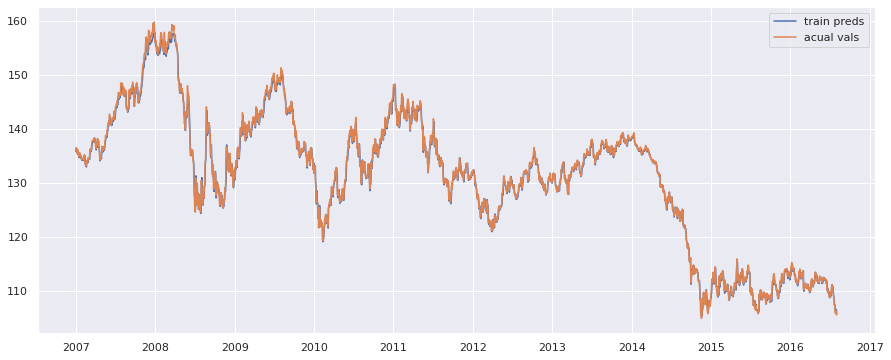

In [21]:
plt.figure(figsize = (15,6))
plt.plot(date[:3000], y_train_pred)
plt.plot(date[:3000], y_train)
plt.legend(["train preds", "acual vals"])

In [22]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_train,y_train_pred)/100

0.005804138460286459

# Test set predictions

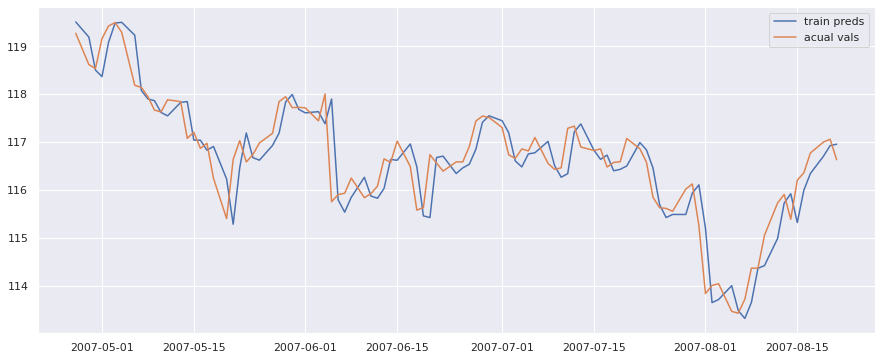

In [23]:
y_pred = model.predict(X_test)

a, b = 200, 100

plt.figure(figsize = (15,6))
plt.plot(date[b:a], y_pred[b:a])
plt.plot(date[b:a], y_test[b:a])
plt.legend(["train preds", "acual vals"])

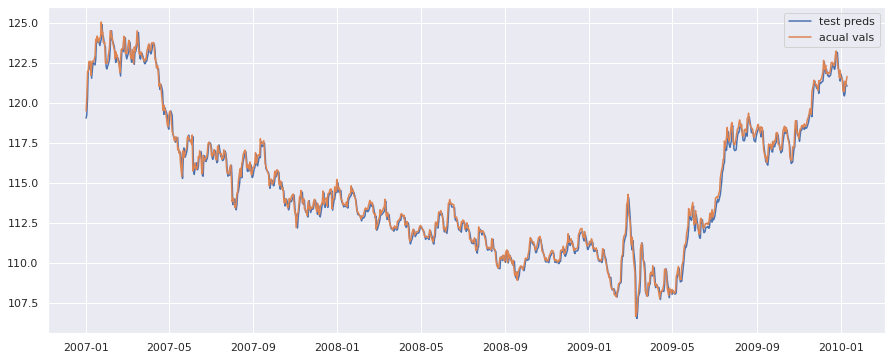

In [24]:
plt.figure(figsize = (15,6))
plt.plot(date[:948], y_pred)
plt.plot(date[:948], y_test)
plt.legend(["test preds", "acual vals"])

In [25]:
from sklearn.metrics import mean_absolute_error as mae
mae(y_test,y_pred)/100

0.0032792363413879106